Enhancing Food Delivery Services: A Predictive Model for Accurate Delivery Time Estimation

Regression with R

In [52]:
install.packages('ggplot2')

Warning message:
"package 'ggplot2' is in use and will not be installed"


In [53]:
library(ggplot2)

In [54]:
data <- read.csv('C:/Users/lusic/OneDrive/Documents/Food Times Delivery Predictions/Clean_Data_latest_updates.csv')
head(data)
# Uploading the data to R and checking making sure the data is uploaded properly

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Time_Delivery
,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,7.93,Windy,Low,Afternoon,Scooter,12,1,43
2,16.42,Clear,Medium,Evening,Bike,20,2,84
3,9.52,Foggy,Low,Night,Scooter,28,1,59
4,7.44,Rainy,Medium,Afternoon,Scooter,5,1,37
5,19.03,Clear,Low,Morning,Bike,16,5,68
6,19.40,Clear,Low,Evening,Scooter,8,9,57


In [ ]:
str(data)
data$Weather <- (as.numeric(factor(data$Weather)))
data$Traffic_Level <- (as.numeric(factor(data$Traffic_Level)))
data$Time_of_Day <- (as.numeric(factor(data$Time_of_Day)))
data$Vehicle_Type <- (as.numeric(factor(data$Vehicle_Type)))
data$Time_Delivery <- (as.numeric(factor(data$Time_Delivery)))
data$Courier_Experience_yrs <- (as.numeric(factor(data$Courier_Experience_yrs)))
data$Preparation_Time_min <- (as.numeric(factor(data$Preparation_Time_min)))
data$Distance_km <- (as.numeric(factor(data$Distance_km)))
# Most of the data are string so it will convert from string to numeric for regression
# Check the result
head(data)

'data.frame':	970 obs. of  8 variables:
 $ Distance_km           : num  7.93 16.42 9.52 7.44 19.03 ...
 $ Weather               : chr  "Windy" "Clear" "Foggy" "Rainy" ...
 $ Traffic_Level         : chr  "Low" "Medium" "Low" "Medium" ...
 $ Time_of_Day           : chr  "Afternoon" "Evening" "Night" "Afternoon" ...
 $ Vehicle_Type          : chr  "Scooter" "Bike" "Scooter" "Scooter" ...
 $ Preparation_Time_min  : int  12 20 28 5 16 8 12 5 20 29 ...
 $ Courier_Experience_yrs: int  1 2 1 1 5 9 1 6 6 1 ...
 $ Time_Delivery         : int  43 84 59 37 68 57 49 46 35 73 ...


,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Time_Delivery
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,307,6,2,1,3,8,2,32
2,630,1,3,2,1,16,3,73
3,365,2,2,4,3,24,2,48
4,283,3,3,1,3,1,2,26
5,737,1,2,3,1,12,6,57
6,749,1,2,2,3,4,10,46


In [56]:
model_test <- lm(Time_Delivery ~ Distance_km + Weather + Traffic_Level + Time_of_Day + Vehicle_Type + Preparation_Time_min + Courier_Experience_yrs, data = data)
summary(model_test)
# Regression Part One


Call:
lm(formula = Time_Delivery ~ Distance_km + Weather + Traffic_Level + 
    Time_of_Day + Vehicle_Type + Preparation_Time_min + Courier_Experience_yrs, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.691  -6.220  -0.908   4.424  65.567 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             8.529031   1.997364   4.270 2.15e-05 ***
Distance_km             0.076485   0.001623  47.133  < 2e-16 ***
Weather                 1.189342   0.218161   5.452 6.34e-08 ***
Traffic_Level          -1.721697   0.447934  -3.844 0.000129 ***
Time_of_Day             0.049122   0.339761   0.145 0.885074    
Vehicle_Type           -0.290195   0.412998  -0.703 0.482441    
Preparation_Time_min    0.958519   0.049947  19.191  < 2e-16 ***
Courier_Experience_yrs -0.597579   0.123694  -4.831 1.58e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.18 on 962 degrees of freedom
Multip

Regress Equation:

Time_Delivery = 𝜷𝟎+ 𝜷𝟏(Distance_km) + 𝜷𝟐 (Weather)+ 𝜷𝟑(Traffic_Level) + 𝜷𝟒(Time_of_Day) + 𝜷𝟓
(Vehicle_Type) + 𝜷𝟔 (Preparation_Time_min) +
𝜷𝟕(Courier_Experience_yrs)



Based on this regression, it is showing better model fit with RSE = 11.18, R-Squared = 0.7352, and Adjusted R-Squared = 0.7333. It is highly significant as shown with F-Test = 381.16 and P-Value < 2.2e-16. Degree of Freedom have 7 predictors and intercept. Based on the 7 Predictors, Distance_km is the most significant due to higher T-value.

In [35]:
conf_intervals <- confint(model_test, level = 0.95)
conf_intervals
# Conducting 95% Confidence Interval to see which predictors are more significant or not.

,2.5 %,97.5 %
(Intercept),4.60933790,12.44872413
Distance_km,0.07330084,0.07966993
Weather,0.76121530,1.61746957
Traffic_Level,-2.60073670,-0.84265670
Time_of_Day,-0.61763666,0.71588084
Vehicle_Type,-1.10067592,0.52028595
Preparation_Time_min,0.86050231,1.05653621
Courier_Experience_yrs,-0.84031965,-0.35483770


Based on this results, it shows all are significant except Time_of_Day and Vehicle_Type who are not significant to the Time Delivery.

NULL

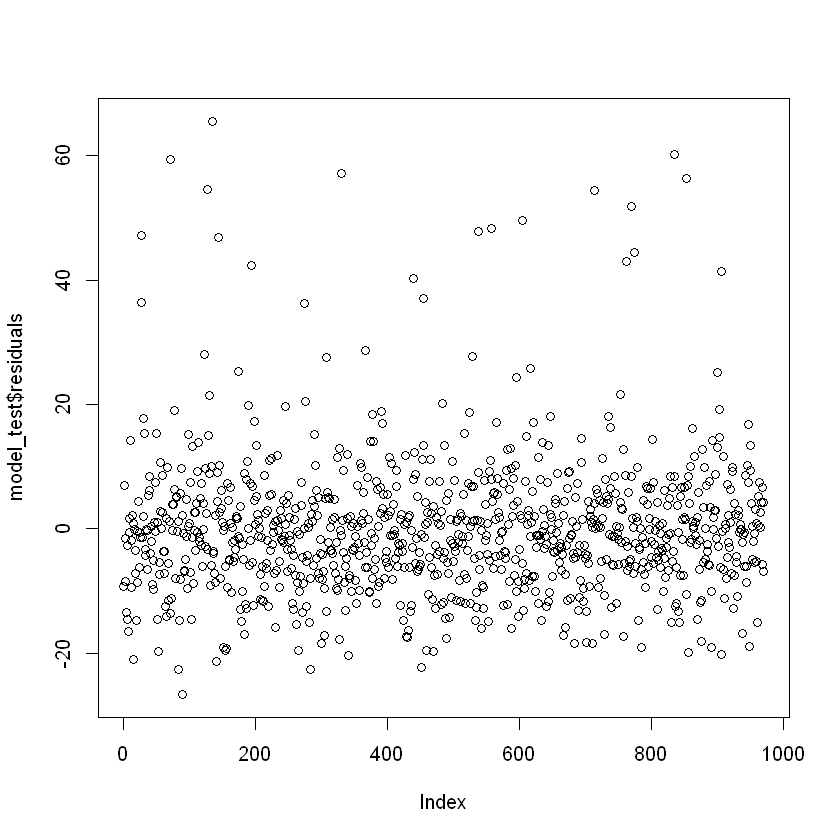

In [ ]:
(plot(model_test$residuals))
# Showing the residuals graph from Regression Part One

In this residual graph, it shows that most residuals cluster between -20 and 60 with most of them around 0. It is shwoing heteroscedasticity because it spread out and it is spreading uneven. No clear trend but however, there are more extreme positive residuals (up to 60) than the negative ones (down to -20). Based on this dense concentration of points around zero, it could have good model fit with significant.

Will regress without two predictors, Time_of_Day and Vehicle_Type as these are not prone to Time Delivery.



In [66]:
# Regress without time of day, and vehicle type as plan to regress who are less likely to prone to time delivery
model_test2 <- lm(Time_Delivery ~ Distance_km + Weather + Traffic_Level + Preparation_Time_min + Courier_Experience_yrs, data = data)
summary(model_test2)


Call:
lm(formula = Time_Delivery ~ Distance_km + Weather + Traffic_Level + 
    Preparation_Time_min + Courier_Experience_yrs, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.720  -6.250  -0.792   4.284  65.769 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             8.148859   1.681848   4.845 1.47e-06 ***
Distance_km             0.076484   0.001621  47.171  < 2e-16 ***
Weather                 1.194333   0.217886   5.481 5.39e-08 ***
Traffic_Level          -1.732633   0.447088  -3.875 0.000114 ***
Preparation_Time_min    0.957783   0.049894  19.196  < 2e-16 ***
Courier_Experience_yrs -0.598697   0.123395  -4.852 1.43e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.17 on 964 degrees of freedom
Multiple R-squared:  0.7351,	Adjusted R-squared:  0.7337 
F-statistic:   535 on 5 and 964 DF,  p-value: < 2.2e-16


Regress Equation:

Time_Delivery = 𝜷𝟎+ 𝜷𝟏(Distance_km) + 𝜷𝟐
(Weather) + 𝜷𝟑(Traffic_Level) + 𝜷𝟒
(Preparation_Time_min) +
𝜷𝟓(Courier_Experience_yrs)

Based on this model, it showing better at capturing variance in the data. RSE = 11.17, R-Squared = 0.7351, Adjusted R-Squared = 0.7337. For the F-Test = 535 and the p-value < 2.2e -16 shows stronger significance due to higher F-Statistic. Degrees of Freedom have 5 Predictors and Intercept.

In [67]:
conf_intervals2 <- confint(model_test2, level = 0.95)
conf_intervals2

#Interpret the 95% Confidence Intervals for Regression Part Two

,2.5 %,97.5 %
(Intercept),4.84835453,11.44936443
Distance_km,0.07330252,0.07966641
Weather,0.76674847,1.62191774
Traffic_Level,-2.61001103,-0.85525414
Preparation_Time_min,0.85986934,1.05569750
Courier_Experience_yrs,-0.84085102,-0.35654291


Based on this 95% Confidence Interval, looks like all the predictors are provely significant because of more prone to Time Delivery.

NULL

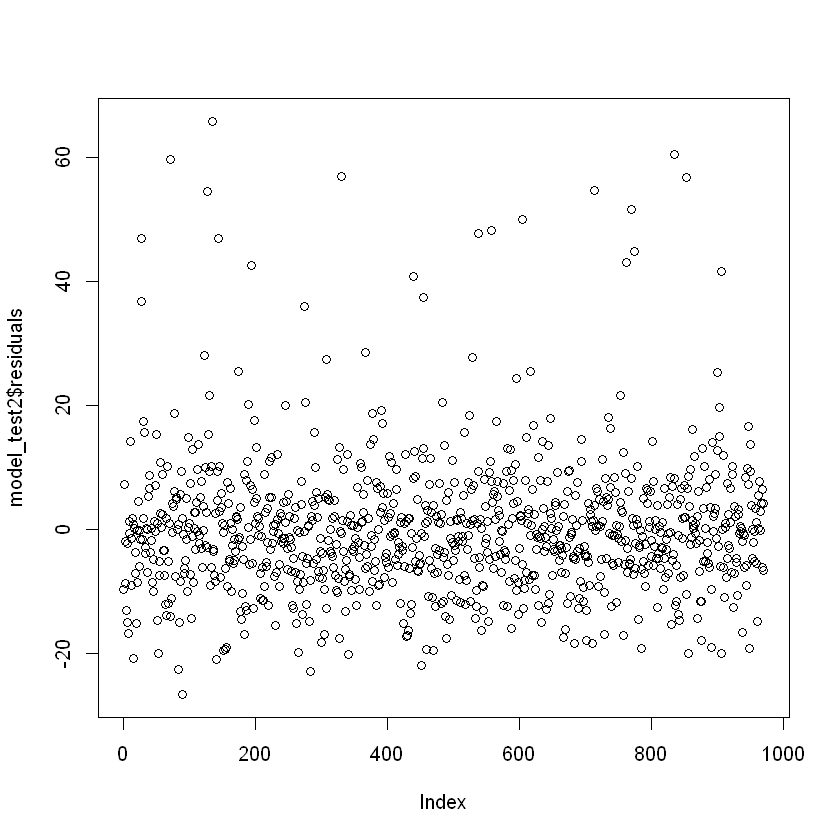

In [68]:
(plot(model_test2$residuals))
# Showing the Regression Part Two for Residuals

After I removed two predictors who are not significant to the Time Delivery, it is shwoing identical to the Regression Part One.